# Measure The 3-5 Bin Heuristics Accuracy

As a refresher, these are our occasions for the 3-5 bin:

1. `Family Event`
2. `Drinking`
3. `Breakfast`
4. `Lunch`
5. `Dinner`
6. `Social Gathering`
7. `After Work`

In [1]:
labels = [
    "FAMILY-EVENT",
    "DRINKING",
    "BREAKFAST",
    "LUNCH",
    "DINNER",
    "SOCIAL-GATHERING",
    "AFTER-WORK"
]

We're going to pick specific labeled tables, and see how our heuristics is doing.

In [2]:
data_map = {
    "hockey": "../data/hockey_3_text_processed.csv",
    "valentine": "../data/valentine_3_text_processed.csv",
    "silvester": "../data/silvester_3_text_processed.csv"
}

The following are taken from the *annotations/occasions_annotations_bin3to5* notebook.

In [3]:
labeled_tables_map = {
    "hockey": [
        (520803608, "LUNCH"),
        (523294848, "FAMILY-EVENT"),
        (514583822, "SOCIAL-GATHERING"),
        (524421347, "FAMILY-EVENT"),
        (521095118, "DRINKING"),
        (522574215, "FAMILY-EVENT"),
        (522779155, "SOCIAL-GATHERING"),
        (515363895, "BREAKFAST"),
        (519501788, "FAMILY-EVENT"),
        (514529424, "SOCIAL-GATHERING")
    ],
    "valentine": [
        (447441456, "FAMILY-EVENT"),
        (435005397, "SOCIAL-GATHERING"),
        (435011399, "LUNCH"),
        (447381509, "LUNCH"),
        (446744761, "LUNCH"),
        (447079489, "DINNER"),
        (434609975, "FAMILY-EVENT"),
        (448041560, "DINNER"),
        (447074978, "AFTER-WORK"),
        (434603220, "LUNCH")
    ],
    "silvester": [
        (362939931, "AFTER-WORK"),
        (361304992, "FAMILY-EVENT"),
        (363233153, "LUNCH"),
        (360790021, "LUNCH"),
        (362924064, "AFTER-WORK"),
        (361776660, "DINNER"),
        (361815160, "DINNER"),
        (360000762, "DINNER"),
        (360402335, "DINNER"),
        (361369624, "DINNER")
    ]
}

------

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Import the classifier function `3to5 Classifier`:

In [5]:
from bin_3to5 import Bin3to5Classifier as Classifier
classifier = Classifier()

-----

### Results per Table:

In [6]:
tables = ["hockey", "valentine", "silvester"]

In [7]:
results = {}

In [8]:
from main import shrink_orders_to_table

In [9]:
for table in tables:
    print("Running for", table)
    df_path = data_map[table]
    df = pd.read_csv(df_path)
    labeled_tables = labeled_tables_map[table]
    
    results[table] = []
    for order_id, true_ocassion in labeled_tables:
        orders = df[df.order_id == order_id]
        orders = shrink_orders_to_table(orders)
        pred_occasion = classifier.classify(orders)
        results[table].append((order_id, true_ocassion, pred_occasion))

Running for hockey
Running for valentine
Running for silvester


#### Show the results:

In [10]:
columns = ["order_id", "true_occasion", "pred_occasion"]

In [11]:
def color(data):
    correct = data["true_occasion"] == data["pred_occasion"]
    if correct:
        color = "#58f200"
    else:
        color = "#ee1300"

    return ["background-color: %s" % color] * len(data.values)

In [12]:
table = "hockey"

df = pd.DataFrame(results[table], columns=columns)
df.index += 1
df.style.apply(color, axis=1)
# df[table].to_csv(str(table) + "_3to5_test_results.csv", index=False)

,order_id,true_occasion,pred_occasion
1,520803608,LUNCH,LUNCH
2,523294848,FAMILY-EVENT,LUNCH
3,514583822,SOCIAL-GATHERING,DINNER
4,524421347,FAMILY-EVENT,FAMILY-EVENT
5,521095118,DRINKING,DRINKING
6,522574215,FAMILY-EVENT,DINNER
7,522779155,SOCIAL-GATHERING,DRINKING
8,515363895,BREAKFAST,BREAKFAST
9,519501788,FAMILY-EVENT,FAMILY-EVENT
10,514529424,SOCIAL-GATHERING,DINNER


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

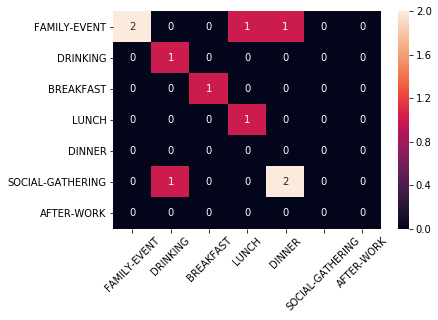

In [13]:
matrix = confusion_matrix(df["true_occasion"], df["pred_occasion"], labels)
sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=True)
plt.xticks(rotation=45)

In [14]:
table = "valentine"

df = pd.DataFrame(results[table], columns=columns)
df.index += 1
df.style.apply(color, axis=1)
# df[table].to_csv(str(table) + "_3to5_test_results.csv", index=False)

,order_id,true_occasion,pred_occasion
1,447441456,FAMILY-EVENT,FAMILY-EVENT
2,435005397,SOCIAL-GATHERING,LUNCH
3,435011399,LUNCH,LUNCH
4,447381509,LUNCH,LUNCH
5,446744761,LUNCH,LUNCH
6,447079489,DINNER,DINNER
7,434609975,FAMILY-EVENT,LUNCH
8,448041560,DINNER,DINNER
9,447074978,AFTER-WORK,DINNER
10,434603220,LUNCH,LUNCH


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

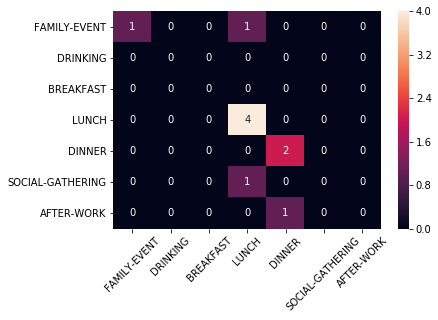

In [15]:
matrix = confusion_matrix(df["true_occasion"], df["pred_occasion"], labels)
sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=True)
plt.xticks(rotation=45)

In [16]:
table = "silvester"

df = pd.DataFrame(results[table], columns=columns)
df.index += 1
df.style.apply(color, axis=1)
# df[table].to_csv(str(table) + "_3to5_test_results.csv", index=False)

,order_id,true_occasion,pred_occasion
1,362939931,AFTER-WORK,UNKNOWN
2,361304992,FAMILY-EVENT,FAMILY-EVENT
3,363233153,LUNCH,LUNCH
4,360790021,LUNCH,LUNCH
5,362924064,AFTER-WORK,DINNER
6,361776660,DINNER,DINNER
7,361815160,DINNER,DINNER
8,360000762,DINNER,DINNER
9,360402335,DINNER,DINNER
10,361369624,DINNER,DINNER


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

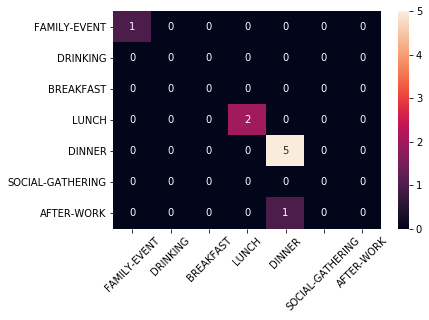

In [17]:
matrix = confusion_matrix(df["true_occasion"], df["pred_occasion"], labels)
sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=True)
plt.xticks(rotation=45)

----------

## Measures Overall

Let's check once again the confusion-matrix for all the tables combined.

In [18]:
results_overall = []

for table in tables:
    for order_id, true_occasion, pred_occasion in results[table]:
        results_overall.append((true_occasion, pred_occasion))

In [19]:
columns = ["true_occasion", "pred_occasion"]

In [20]:
df = pd.DataFrame(results_overall, columns=columns)
df.index += 1
df.style.apply(color, axis=1)

,true_occasion,pred_occasion
1,LUNCH,LUNCH
2,FAMILY-EVENT,LUNCH
3,SOCIAL-GATHERING,DINNER
4,FAMILY-EVENT,FAMILY-EVENT
5,DRINKING,DRINKING
6,FAMILY-EVENT,DINNER
7,SOCIAL-GATHERING,DRINKING
8,BREAKFAST,BREAKFAST
9,FAMILY-EVENT,FAMILY-EVENT
10,SOCIAL-GATHERING,DINNER


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

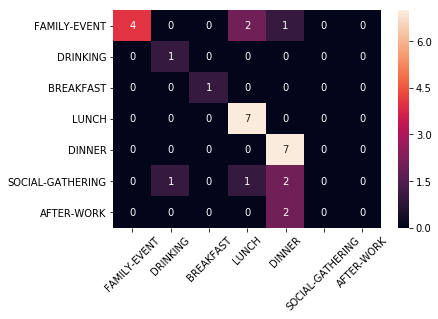

In [21]:
matrix = confusion_matrix(df["true_occasion"], df["pred_occasion"], labels)
sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=True)
plt.xticks(rotation=45)

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
print(classification_report(df["true_occasion"], df["pred_occasion"], labels=labels))

                  precision    recall  f1-score   support

    FAMILY-EVENT       1.00      0.57      0.73         7
        DRINKING       0.50      1.00      0.67         1
       BREAKFAST       1.00      1.00      1.00         1
           LUNCH       0.70      1.00      0.82         7
          DINNER       0.58      1.00      0.74         7
SOCIAL-GATHERING       0.00      0.00      0.00         4
      AFTER-WORK       0.00      0.00      0.00         3

       micro avg       0.69      0.67      0.68        30
       macro avg       0.54      0.65      0.56        30
    weighted avg       0.58      0.67      0.59        30



----

### Notes

1. The model often confuses `FAMILY-EVENT` occasions with meals (`BREAKFAST` / `LUNCH` / `DINNER`).  
    This is because the `kids_meal` needs an update (performs quite bad).  
    Recheck when update is done.  
2. The model often confuses `SOCIAL-GATHERING` / `AFTER-WORK` occasions with meals.  
    This is because a `main_dish` feature is necessary.  
    Once this one is added, we could easily distinguish main dishes from shareable ones.  